In [130]:
%matplotlib inline

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [133]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Unnamed: 0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. nan]
Date
['27-12-2015' '20-12-2015' '13-12-2015' '06-12-2015' '29-11-2015'
 '22-11-2015' '15-11-2015' '08-11-2015' '01-11-2015' '25-10-2015'
 '18-10-2015' '11-10-2015' '04-10-2015' '27-09-2015' '20-09-2015'
 '13-09-2015' '06-09-2015' '30-08-2015' '23-08-2015' '16-08-2015'
 '09-08-2015' '02-08-2015' '26-07-2015' '19-07-2015' '12-07-2015'
 '05-07-2015' '28-06-2015' '21-06-2015' '14-06-2015' '07-06-2015'
 '31-05-2015' '24-05-2015' '17-05-2015' '10-05-2015' '03-05-2015'
 '26-04-2015' '19-04-2015' '12-04-2015' '05-04-2015' '29-03-2015'
 '22-03-2015' '15-03-2015' '08-03-2015' '01-03-2015' '22-02-2015'
 '15-02-2015' '08-02-2015' '01-02-2015' '25-01-2015' '18-01-2015'
 '11-01-2015' '04-01-2015' '25-12-2016' '18-12-2016' '11-12-2016'
 '04-12-2016' '27-11-2016' '20-11-2016' '1

The dataset contains TotalUS avocado sales, which we can drop

In [134]:
print(df.shape)
df = df[df['region']!= 'TotalUS']
df.shape

(16468, 14)


(16443, 14)

In [135]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Dropping all the null values

In [136]:
df = df.dropna()
df.shape

(1492, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc09710a790>,
      dtype=object)

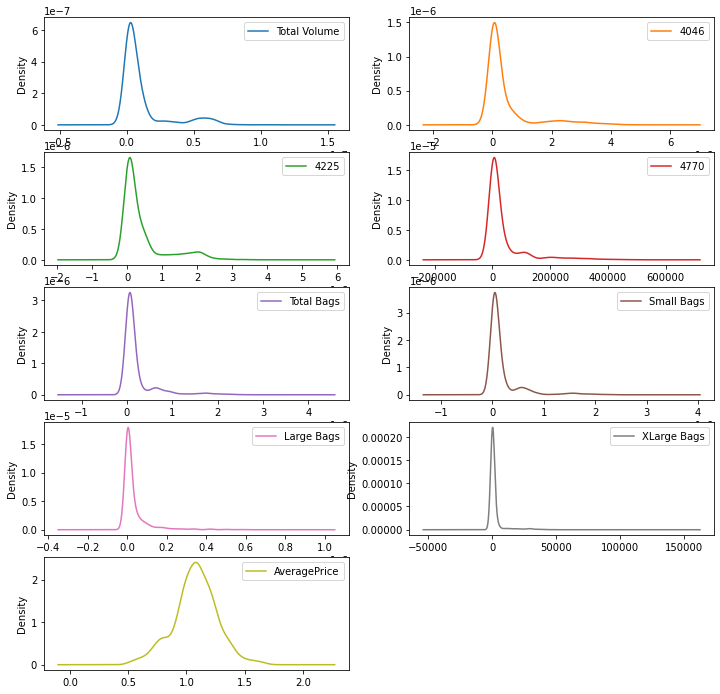

In [223]:
num = df[['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']]
num.plot(kind = 'kde', subplots = True, sharex = False, layout = (5,2), figsize = (12,12))


The deviation is low in the variables. now lets check for outliers

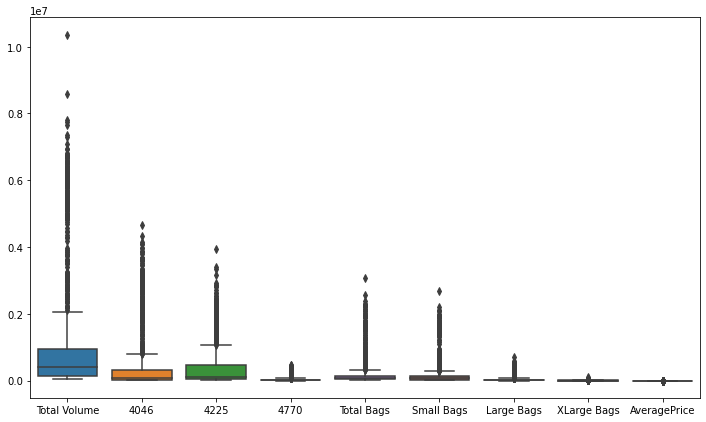

In [138]:
plt.figure().set_size_inches(12,7)
sns.boxplot(data = num)

So we have high number of outliers in the dataset. we will drop them later

In [139]:
from scipy.stats import zscore
num1 = 0
def outliers(column):
    global num1
    z = abs(zscore(df[column]))
    for i in z:
        if i>4.5:
            num1 = num1+1
    print(num1)

In [140]:
outliers("Total Volume")

1


In [141]:
outliers("4046")

6


In [142]:
outliers("4225")

9


In [143]:
outliers('4770')

23


In [144]:
outliers("Total Bags")

40


In [145]:
outliers("Small Bags")

59


In [146]:
outliers("Large Bags")

78


In [147]:
outliers("XLarge Bags")

95


Lets remove only extreme values (z > 4.5)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1492 non-null   float64
 1   Date          1492 non-null   object 
 2   AveragePrice  1492 non-null   float64
 3   Total Volume  1492 non-null   float64
 4   4046          1492 non-null   float64
 5   4225          1492 non-null   float64
 6   4770          1492 non-null   float64
 7   Total Bags    1492 non-null   float64
 8   Small Bags    1492 non-null   float64
 9   Large Bags    1492 non-null   float64
 10  XLarge Bags   1492 non-null   float64
 11  type          1492 non-null   object 
 12  year          1492 non-null   float64
 13  region        1492 non-null   object 
dtypes: float64(11), object(3)
memory usage: 174.8+ KB


In [149]:
df.drop("type", axis = 1, inplace = True)

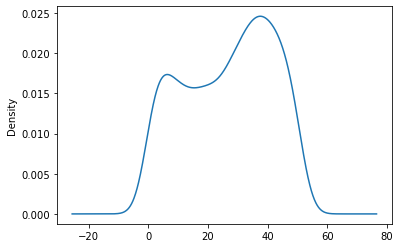

In [150]:
df['Unnamed: 0'].plot(kind = 'kde')

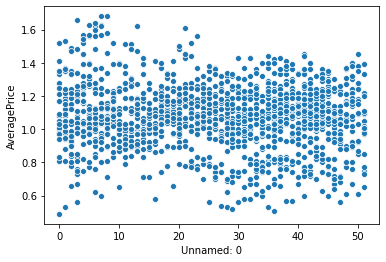

In [151]:
plt.figure()
sns.scatterplot(x = 'Unnamed: 0', y = "AveragePrice", data = df)

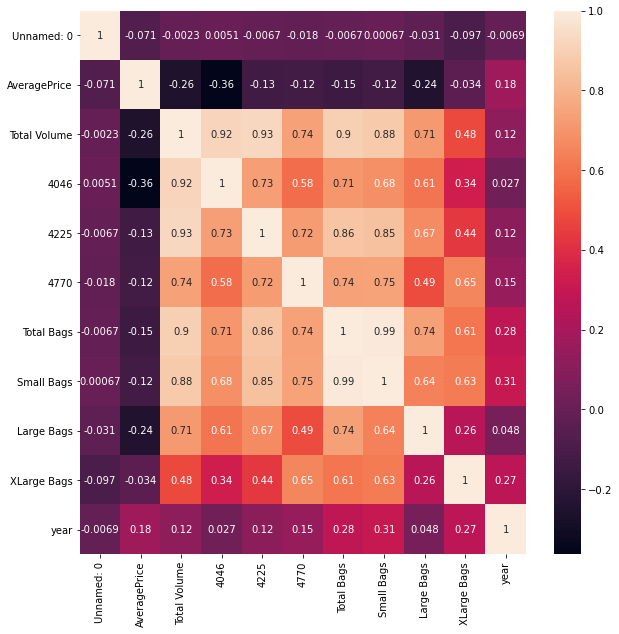

In [152]:
plt.figure().set_size_inches(10,10)
sns.heatmap(df.corr(), annot = True)

There are multiple values which are highly correlated. Applying PCA analysis will work well in case of these components

Plus: Total Bags and Total Volume seem to be redundant data, so we can remove them.
(Or keep them and remove the rest?)

In [153]:
#df.drop(['Total Volume', 'Total Bags', 'Unnamed: 0'], axis = 1, inplace = True)

<Figure size 432x288 with 0 Axes>

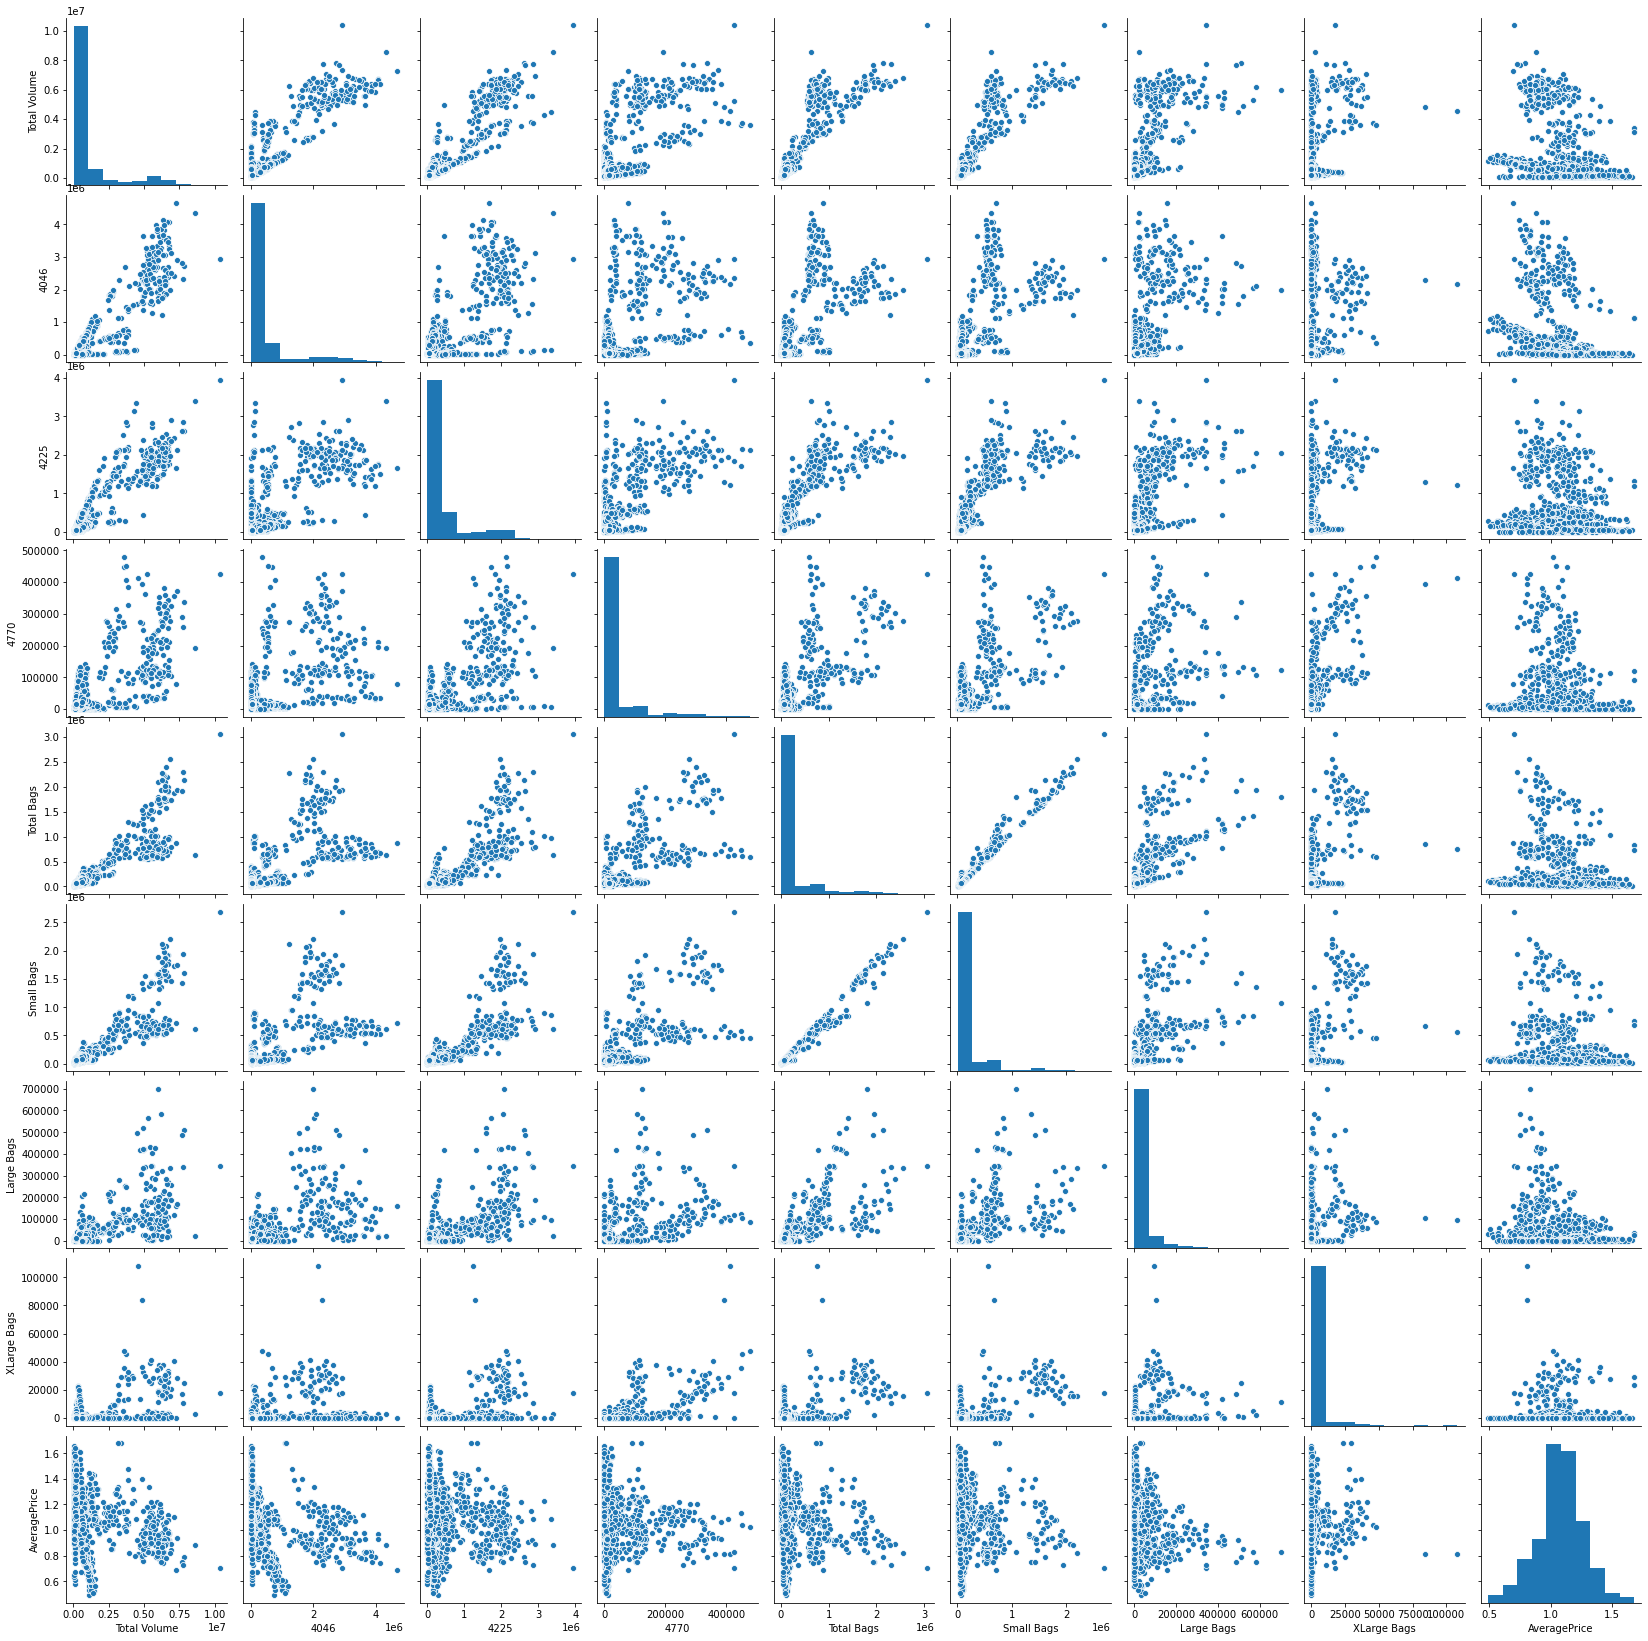

In [154]:
plt.figure()
sns.pairplot(data = num)

As we see in the Pairplot and heatmap, the features have fair amount of correlation amongst themselves, but have low correlation with the Target Column : AveragePrice 

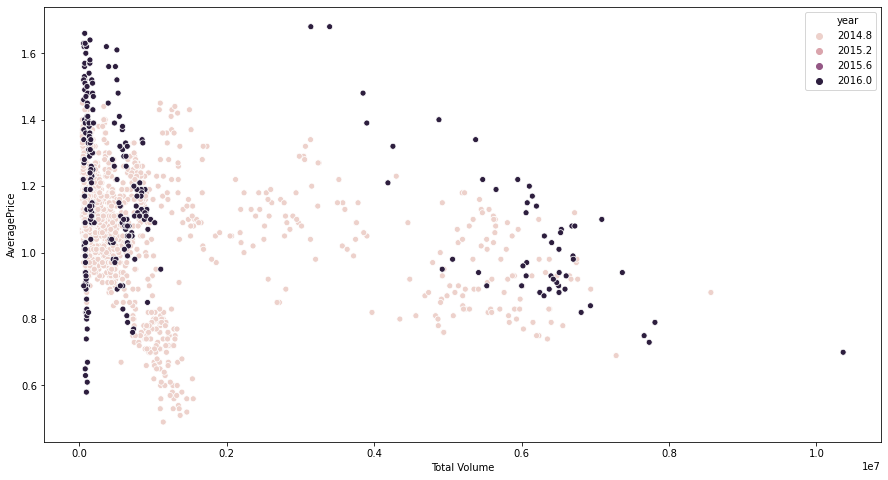

In [156]:
plt.figure().set_size_inches(15,8)
sns.scatterplot(y = "AveragePrice", x = "Total Volume",hue = "year", data = df)

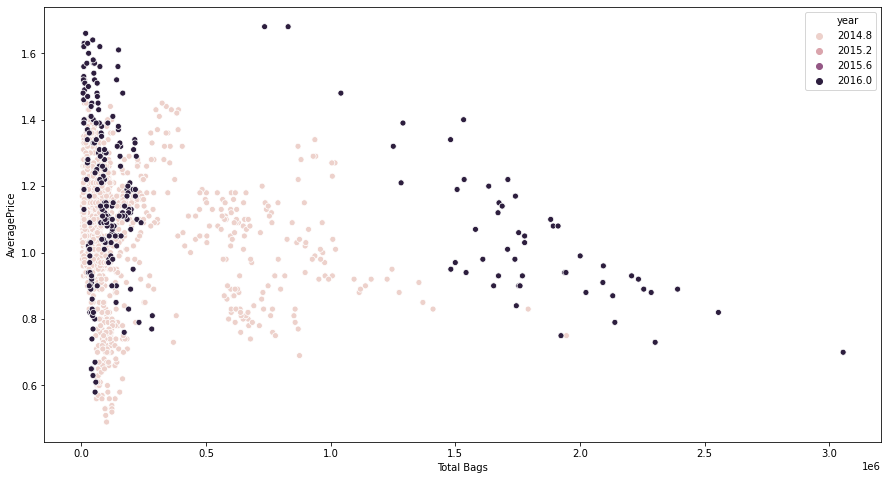

In [157]:
plt.figure().set_size_inches(15,8)
sns.scatterplot(y = "AveragePrice", x = "Total Bags",hue = "year", data = df)

In [158]:
df['year'].unique()

array([2015., 2016.])

Lets check the time line

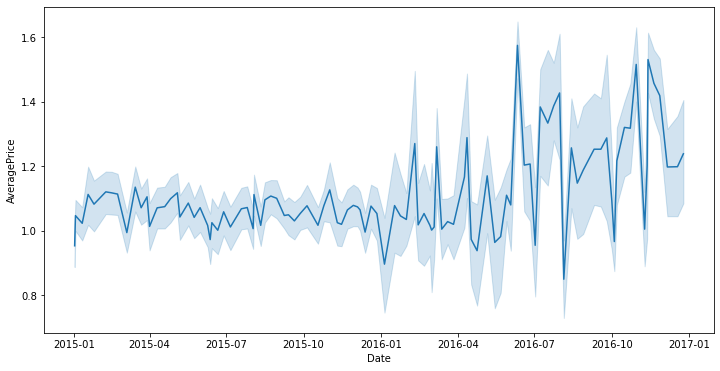

In [163]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure().set_size_inches(12,6)
sns.lineplot(x = 'Date', y = "AveragePrice", data = df)

The price becomes erratic after Jan - 2016. Maybe this is due to noise/outliers in data.

Average price has increased in 2016, 2015 Avocado prices are mostly stable.

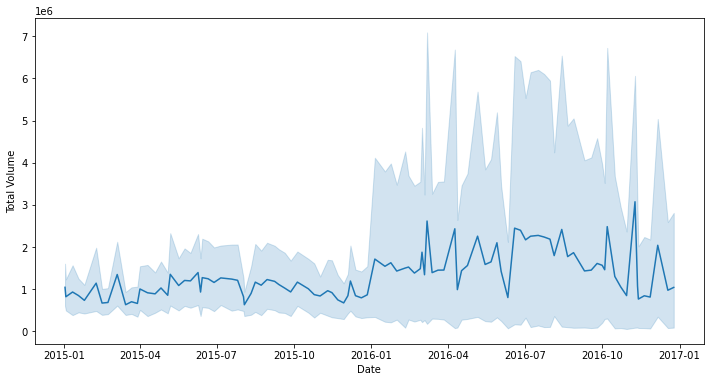

In [164]:
plt.figure().set_size_inches(12,6)
sns.lineplot(x = 'Date', y = 'Total Volume', data = df)

The Total Volume of avocado sold increased in 2016, but after Oct-2016, decreased slightly. This was due to worker strikes in Mexico.

At the start of the year till around winter, most of the avocados are bought from California State, but after Oct, Avocados are brought in from Mexico.

Source : Avocados shortage? US prices surge amid Mexican strike. (https://www.csmonitor.com/Business/2016/1025/Avocados-shortage-US-prices-surge-amid-Mexican-strike)   

# Data Preprocessing

Handling Categorical Data:

There are only two Categorical Variables: Year and Region


In [166]:
#year
dummies = pd.get_dummies(df['year'], drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop("year", axis = 1, inplace = True)

In [171]:
df.groupby("region")[['AveragePrice', 'Total Volume']].mean().sort_values(by = 'Total Volume', ascending = False)

,AveragePrice,Total Volume
region,,
California,1.055921,6.035277e+06
West,0.940833,5.574939e+06
SouthCentral,0.818718,5.496995e+06
Northeast,1.236667,3.465864e+06
GreatLakes,1.107222,3.276358e+06
Southeast,1.091111,3.055239e+06
LosAngeles,0.863333,2.732180e+06
Midsouth,1.081111,2.355099e+06
Plains,1.051667,1.672975e+06


Instead of using all the regions, we will encode only the top ten regions with largest Avocado Volume, and compile the others in a column named 'other'

In [173]:
topten = list(df.groupby("region")['Total Volume'].mean().sort_values(ascending = False).head(10).index)
topten

['California',
 'West',
 'SouthCentral',
 'Northeast',
 'GreatLakes',
 'Southeast',
 'LosAngeles',
 'Midsouth',
 'Plains',
 'NewYork']

In [176]:
def region(row):
    if row['region'] in topten:
        row[row['region']] = 1
    else:
        row['others'] = 1
    return row
df = df.apply(region, axis = 1)

In [178]:
df.fillna(0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   4046          1492 non-null   float64       
 1   4225          1492 non-null   float64       
 2   4770          1492 non-null   float64       
 3   AveragePrice  1492 non-null   float64       
 4   Date          1492 non-null   datetime64[ns]
 5   Large Bags    1492 non-null   float64       
 6   Small Bags    1492 non-null   float64       
 7   Total Bags    1492 non-null   float64       
 8   Total Volume  1492 non-null   float64       
 9   Unnamed: 0    1492 non-null   float64       
 10  XLarge Bags   1492 non-null   float64       
 11  region        1492 non-null   object        
 12  2016.0        1492 non-null   int64         
 13  others        1492 non-null   float64       
 14  California    1492 non-null   float64       
 15  GreatLakes    1492 non-null   float64 

In [180]:
df.drop(["Date", "region"], axis = 1, inplace = True)

In [181]:
from sklearn.model_selection import train_test_split
X = df.drop("AveragePrice", axis = 1)
y = df['AveragePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [184]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative Variance')

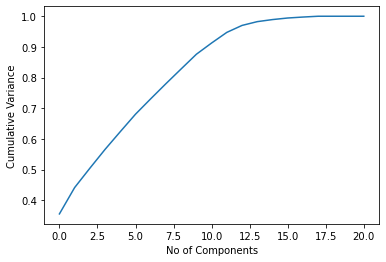

In [186]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Components")
plt.ylabel("Cumulative Variance")

So around 10-12 components, 90% of variance is preserved, so taking 10 components first, and then varying to see which number gives the best results

In [218]:
pca10 = PCA(n_components = 5).fit(X_train_sc)
X_train_pca = pca10.transform(X_train_sc)
X_test_pca = pca10.transform(X_test_sc)

In [202]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_pca, y_train)
y_pred = linreg.predict(X_test_pca)
r2_score(y_test, y_pred)

0.19111163554042854

In [219]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train_pca,y_train)
y_pred = knr.predict(X_test_pca)
r2_score(y_test, y_pred)

0.663740573676366

So we are getting good results from KNeighborsRegressor

In [198]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_pca,y_train)
y_pred = ridge.predict(X_test_pca)
r2_score(y_test, y_pred)

0.19177324391010375

In [199]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_pca,y_train)
y_pred = lasso.predict(X_test_pca)
r2_score(y_test, y_pred)

-0.0046418727595187725

Both Ridge and Lasso are showing poor performance

In [222]:
max_score = 0
for i in range(1, 50, 2):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_pca,y_train)
    y_pred = knr.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    print("R2 = {} for n = {}".format(r2, i))
    if r2>max_score:
        max_score = r2
        neighbors = i
print("Max r2 score = {} for k = {}".format(max_score, neighbors))

R2 = 0.5842525939075534 for n = 1
R2 = 0.670053589766986 for n = 3
R2 = 0.663740573676366 for n = 5
R2 = 0.6321824522953147 for n = 7
R2 = 0.6096863852113501 for n = 9
R2 = 0.5965516614692024 for n = 11
R2 = 0.5879958220884393 for n = 13
R2 = 0.5796360341562485 for n = 15
R2 = 0.5716611383513364 for n = 17
R2 = 0.5626795882097196 for n = 19
R2 = 0.5516561119686412 for n = 21
R2 = 0.5280701691612937 for n = 23
R2 = 0.5193603470146431 for n = 25
R2 = 0.5088048780594079 for n = 27
R2 = 0.4986538324655191 for n = 29
R2 = 0.48933417877333785 for n = 31
R2 = 0.479410364764457 for n = 33
R2 = 0.4682366683127277 for n = 35
R2 = 0.46315814337476535 for n = 37
R2 = 0.4569199818844014 for n = 39
R2 = 0.4491787635978346 for n = 41
R2 = 0.4427662607841186 for n = 43
R2 = 0.4384322892384014 for n = 45
R2 = 0.4353654933888207 for n = 47
R2 = 0.4301499152050774 for n = 49
Max r2 score = 0.670053589766986 for k = 3


Thus we are getting best results for KNeighborRegressor and k = 3, after applying PCA with n_components = 5